La empresa Mnist Fashion cuenta con 60.000 imágenes para ser entrenadas y cuenta  con otras 10.000 imágenes que sirven para evaluar la precisión de nuestro modelo en clasificar las prendas, cabe resaltar que todas las imágenes están con una dimensión de 28 por 28px y tenemos 10 tipos de clases de ellas, donde podemos encontrar abrigos, poleras, zapatillas, tacones, entre otros

1.  Instale el ambiente de Tensorflow

pip install tensorflow

In [1]:
# Importar las bibliotecas necesarias
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

2.  Carga de la data

In [2]:
# Cargar el conjunto de datos de moda de MNIST de Keras
fashion_mnist = keras.datasets.fashion_mnist

# Dividir el conjunto de datos en entrenamiento y prueba
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Definir los nombres de las clases en el conjunto de datos de moda de MNIST
class_names = ['Camiseta/top', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo',
              'Sandalia', 'Camisa', 'Zapatilla de deporte', 'Bolsa', 'Bota de tobillo']

3.  Descripción de la base de datos

Número de etiquetas de entrenamiento: 60000, Su altura: 28 y su ancho: 28
Número de etiquetas de prueba: 10000, Su altura: 28 y su ancho: 28


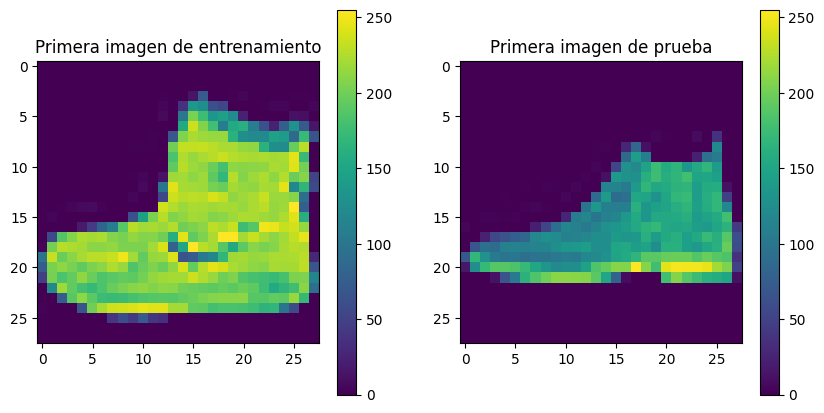

In [3]:
# Mostrar la forma de train_images, que nos dará el número de imágenes y su dimensión (altura y anchura)
train_images.shape
#Dividimos los datos de entrenamiento en 3 variables
num_imagenes, altura, anchura = train_images.shape

# Mostrar la cantidad de train_labels y sus dimensiones
print(f'Número de etiquetas de entrenamiento: {num_imagenes}, Su altura: {altura} y su ancho: {anchura}')

# Mostrar la longitud de train_labels, que nos dará el número total de etiquetas de entrenamiento
len(train_labels)

# Mostrar las etiquetas de entrenamiento
train_labels

# Mostrar la forma de test_images, que nos dará el número de imágenes de prueba y su dimensión (altura y anchura)
test_images.shape
# Dividimos los datas de prueba en 3 variables
num_imagenes_prueba, altura_prueba, anchura_prueba = test_images.shape

# Mostrar las cantidad de las etiquetas de prueba y su dimensión
print(f'Número de etiquetas de prueba: {num_imagenes_prueba}, Su altura: {altura_prueba} y su ancho: {anchura_prueba}')

# Mostrar la longitud de test_labels, que nos dará el número total de etiquetas de prueba
len(test_labels)

# Crear una nueva figura
plt.figure(figsize=(10, 5))

# Mostrar la primera imagen de entrenamiento
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, posición 1
plt.imshow(train_images[0])
plt.title('Primera imagen de entrenamiento')
plt.colorbar()
plt.grid(False)

# Mostrar la primera imagen de prueba
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, posición 2
plt.imshow(test_images[0])
plt.title('Primera imagen de prueba')
plt.colorbar()
plt.grid(False)

# Mostrar la figura
plt.show()

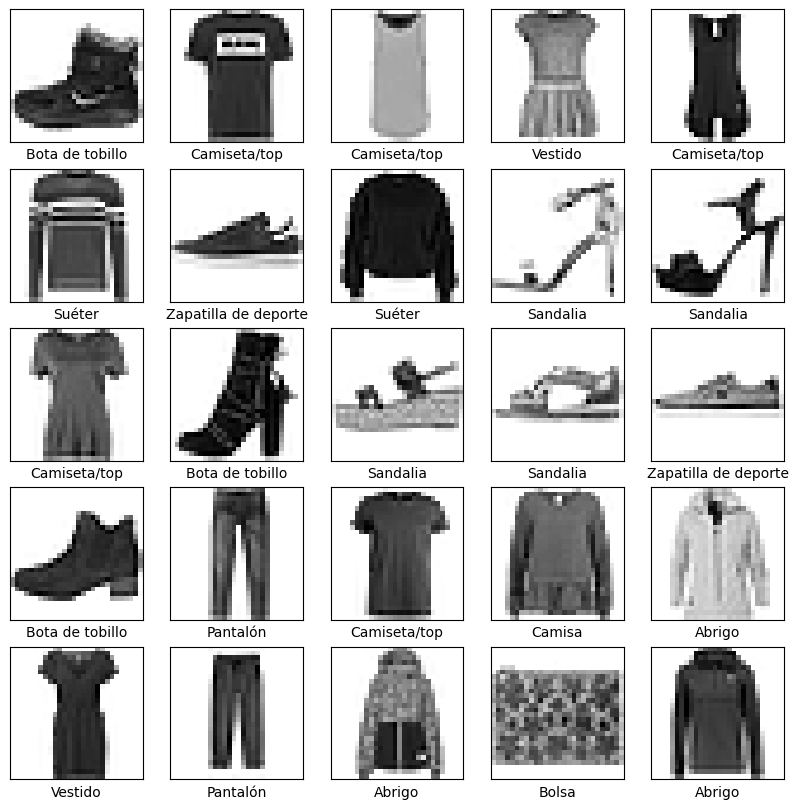

In [4]:
# Normalizar las imágenes de entrenamiento y prueba
train_images = train_images / 255.0
test_images = test_images / 255.0

# Mostrar las primeras 25 imágenes de entrenamiento
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()



4.  Configuración de la red neuronal

In [5]:
# Definir el modelo
model = keras.Sequential([
    keras.layers.Input(shape=(28, 28)),  # Capa de entrada
    keras.layers.Flatten(),  # Capa para aplanar la imagen
    keras.layers.Dense(128, activation='relu'),  # Capa oculta con 128 neuronas
    keras.layers.Dense(10, activation='softmax')  # Capa de salida con 10 neuronas (una para cada clase)
])

5.  Compilación de la red neuronal

In [6]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



6.  Entrenamiento de la red

In [7]:
# Entrenar el modelo
model.fit(train_images, train_labels, epochs=10)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nPrueba de exactitud:', test_acc)



Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7802 - loss: 0.6255
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8600 - loss: 0.3883
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8762 - loss: 0.3425
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8848 - loss: 0.3179
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8919 - loss: 0.2937
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8975 - loss: 0.2774
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9032 - loss: 0.2649
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9023 - loss: 0.2619
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9109 - loss: 0.2432
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9110 - loss: 0.2372
313/313 - 1s - 2ms/step - accuracy: 0.8832 - loss: 0.3397

Prueba de exactitud: 0.8831999897956848


7.  Predicción y conclusión.

In [8]:
# Hacer predicciones
predictions = model.predict(test_images)

# Mostrar la primera predicción
predictions[0]

# Mostrar la etiqueta predicha para la primera imagen
np.argmax(predictions[0])

# Mostrar la etiqueta real de la primera imagen
test_labels[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


9

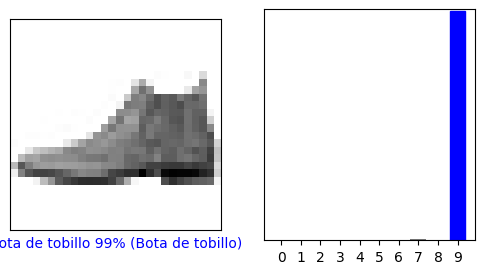

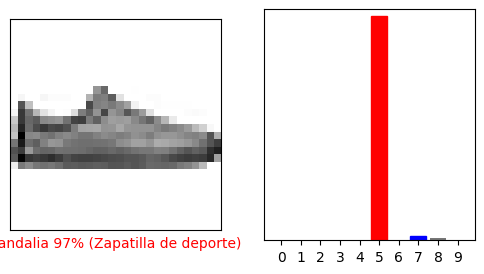

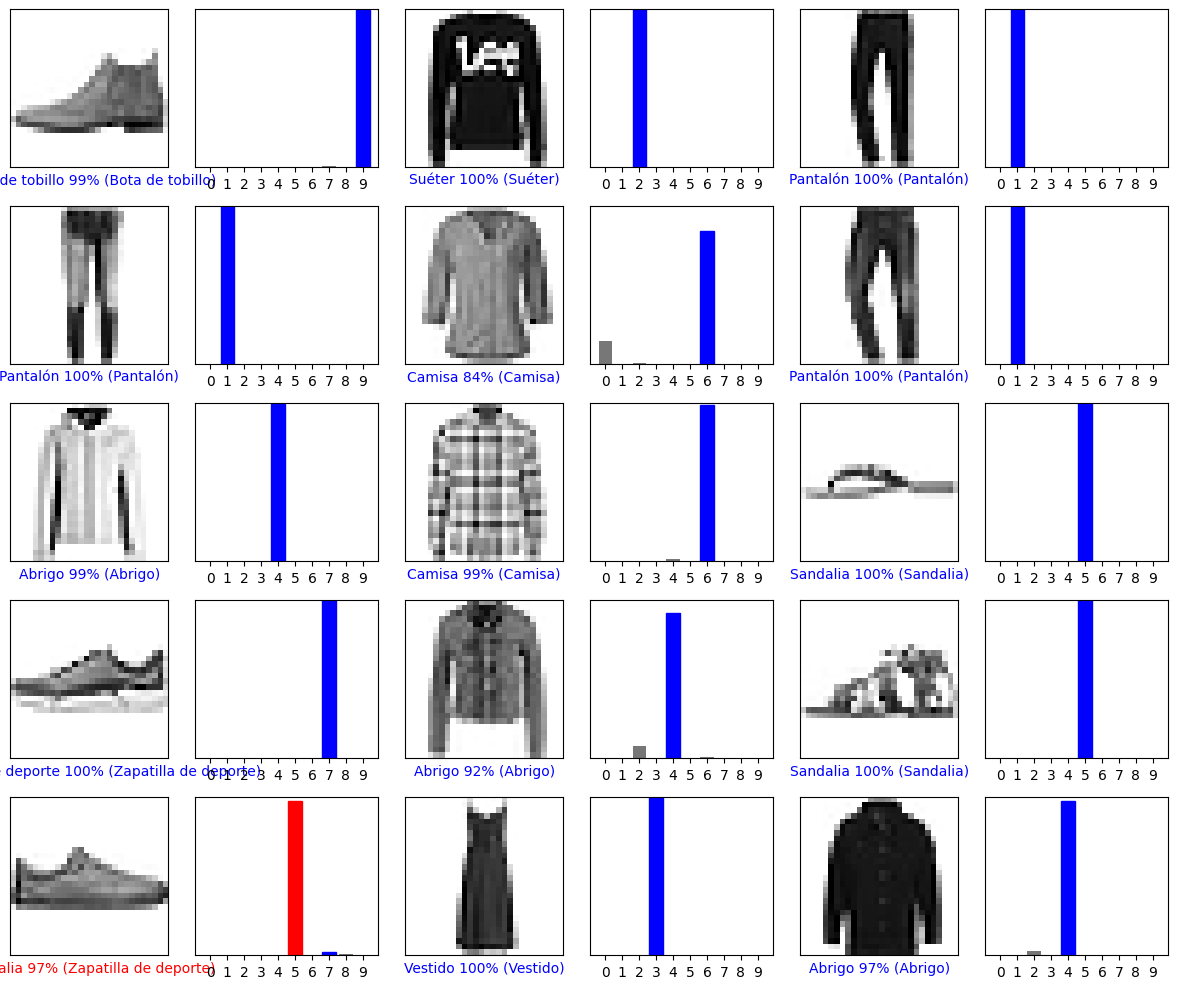

(28, 28)
(1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[1.0584804e-05 4.4111351e-12 9.9846542e-01 7.7095202e-10 1.4354329e-03
  5.4553768e-11 8.8588975e-05 4.1702706e-21 2.2703450e-09 6.7357996e-18]]


2

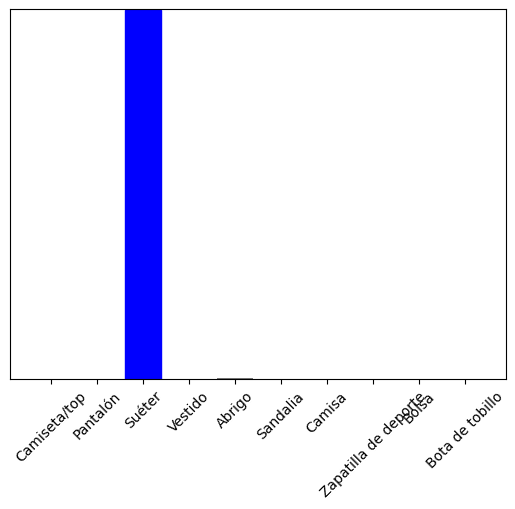

In [9]:

# Definir una función para trazar la imagen
def plot_image(i, predictions_array, true_label, img):
  # Asignar los valores de entrada a las variables correspondientes
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  # Configurar el gráfico para que no tenga cuadrícula y no muestre las marcas de los ejes
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  # Mostrar la imagen en escala de grises
  plt.imshow(img, cmap=plt.cm.binary)

  # Obtener la etiqueta predicha (el índice del valor máximo en el array de predicciones)
  predicted_label = np.argmax(predictions_array)
  # Si la etiqueta predicha coincide con la verdadera, el color del texto será azul, de lo contrario será rojo
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  # Mostrar la etiqueta predicha, la confianza de la predicción y la etiqueta verdadera en el eje x
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

# Definir una función para trazar el array de valores
def plot_value_array(i, predictions_array, true_label):
  # Asignar los valores de entrada a las variables correspondientes
  predictions_array, true_label = predictions_array, true_label[i]
  # Configurar el gráfico para que no tenga cuadrícula y muestre las marcas de los ejes x
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  # Crear un gráfico de barras con las predicciones
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  # Limitar el eje y entre 0 y 1
  plt.ylim([0, 1])
  # Obtener la etiqueta predicha
  predicted_label = np.argmax(predictions_array)

  # Colorear la barra de la etiqueta predicha de rojo y la de la verdadera de azul
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# A continuación, se muestran varias imágenes con sus predicciones y los arrays de valores correspondientes
# Para cada imagen, se crea una figura con dos subgráficos: uno para la imagen y otro para el array de valores
# En el caso de una sola imagen, se muestra su forma antes y después de expandir sus dimensiones para la predicción
# Finalmente, se muestra el array de predicciones y se obtiene la etiqueta predicha

# Mostrar la primera imagen, la predicción y el array de valores
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

# Mostrar la imagen 12, la predicción y el array de valores
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

# Mostrar varias imágenes, predicciones y arrays de valores
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# Predecir una sola imagen
img = test_images[1]
print(img.shape)

img = (np.expand_dims(img,0))
print(img.shape)

predictions_single = model.predict(img)
print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

np.argmax(predictions_single[0])


Conclusion

Se puede ver que el modelo tiene un muy alto  percentage de exactitud sobre un 88%
Lo que Se puede apreciar que el modelo reconoció que las imágenes correspondían  a las etiquetas sobre un 90% cada una.
En resumen el modelo es muy eficiente